# Data Management and Visualization, assignment 4: Creating Graphs

## Dataset
I am using the bike sharing dataset of https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset, which provides data on how many bikes are rent out on specific hours of specific days, the weather on these days, whether the day was a weekday or not, etc. I would like to be able to predict the number of bikes rented out, given some information on a specific day and/or time (e.g. the weather conditions, which day/time it is, whether it is a weekday/holiday, etc.).

## Loading data

In [16]:
%matplotlib inline
import pandas
data = pandas.read_csv('hour.csv', low_memory=False)
print("Number of observations: ",len(data))
data.head()

Number of observations:  17379


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data management

In [17]:
data['month_no'] = data['yr']*12+data['mnth']

In [18]:
seasmap = {1: '1. Winter', 2:'2. Spring', 3:'3. Summer', 4:'4. Fall'}
data['season'] = data['season'].map(seasmap)
sub = data[['season','month_no', 'mnth', 'hr','weekday', 'workingday', 'weathersit','temp','hum', 'windspeed','cnt']]
sub = sub.copy()

## Univariate Graphs

I'm skippingg the graphs for season, monthno, month, day of the week and hour, since I've already shown in the data management assignments that these are uniformally distributed and that measurements are available for all these time moments.

### workingday

count     17379
unique        2
top           1
freq      11865
Name: workingday, dtype: int64

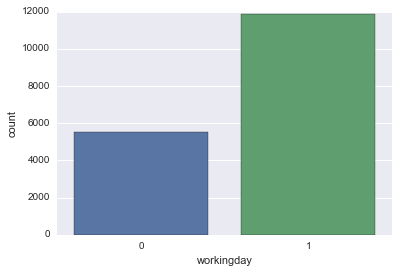

In [31]:
import seaborn
import matplotlib.pyplot as plt
sub['workingday'] = sub['workingday'].astype('category')
seaborn.countplot(x='workingday', data=sub);
sub.workingday.describe()

There are roughly 2x more working days than free days.

### weather situation

count     17379
unique        4
top           1
freq      11413
Name: weathersit, dtype: int64

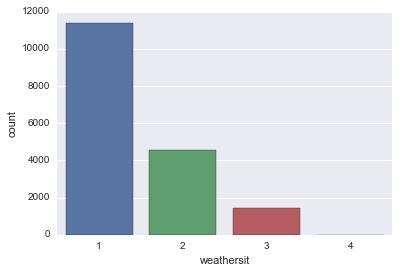

In [32]:
sub['weathersit'] = sub['weathersit'].astype('category')
seaborn.countplot(x='weathersit', data=sub);
sub.weathersit.describe()

Bad weather situations occur less frequently than good weather (lower numbers of weathersit).

### temperature

count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

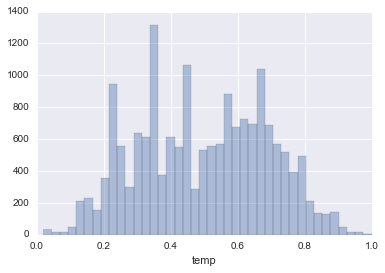

In [33]:
seaborn.distplot(data['temp'],kde=False);
sub.temp.describe()

Temperature seems to be bimodally distributed, with peaks around 0.3 and 0.65.

### humididty

count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

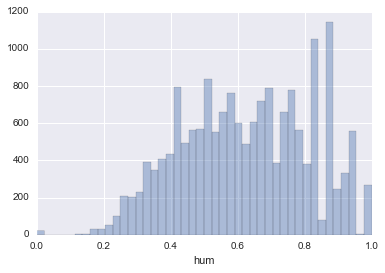

In [34]:
seaborn.distplot(data['hum'],kde=False);
sub.hum.describe()

humidity seems to be normally distributed, but some peaks occur around 0.8..1.0 humidity.

### windspeed

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

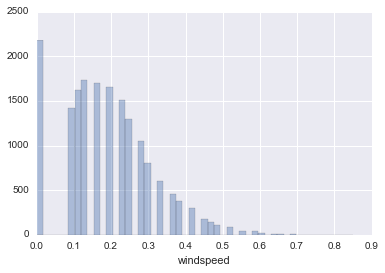

In [35]:
seaborn.distplot(data['windspeed'],kde=False);
sub.windspeed.describe()

The distribution of wind speed is right skewed.

### number of bikes rented

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

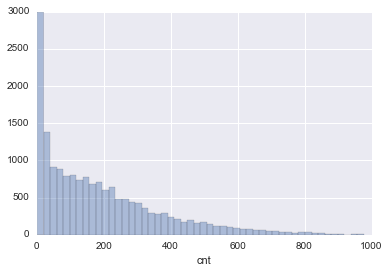

In [36]:
seaborn.distplot(data['cnt'],kde=False);
sub.cnt.describe()

The distribution of the number of bikes rent is right skewed.

## Bivariate graphs

### season

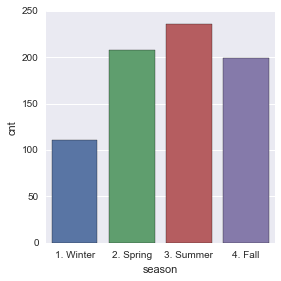

In [42]:
seaborn.factorplot(x='season', y='cnt',data=data, kind='bar', ci=None);

There seems to be a seasonal effect on the number of bikes rent, with most bikes rent in summer and least in winter.

### month

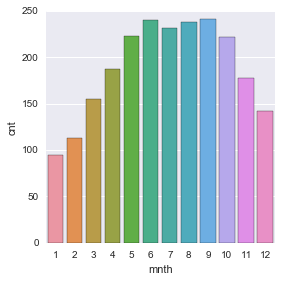

In [54]:
seaborn.factorplot(x='mnth', y='cnt',data=data, kind='bar', ci=None);

This plot shows a similar seasonal effect as the one above.

### hour

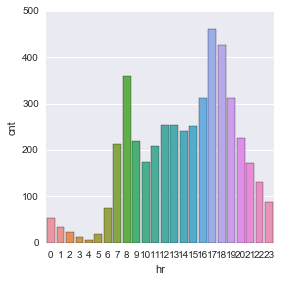

In [49]:
seaborn.factorplot(x='hr', y='cnt',data=data, kind='bar', ci=None);

Most bikes seem to be rent during rush hour 7-9 am; 5-7pm, fewer bikes ar rent late at night.

### weekday

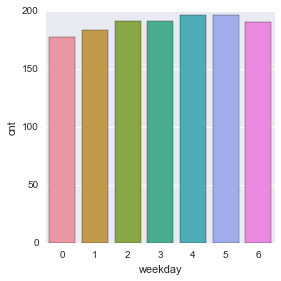

In [51]:
seaborn.factorplot(x='weekday', y='cnt',data=data, kind='bar', ci=None);

The day of the week does not seem to affect the number of bikes rent much.

### workingday

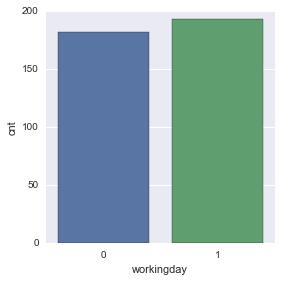

In [52]:
seaborn.factorplot(x='workingday', y='cnt',data=data, kind='bar', ci=None);

On non-working days slightly fewer bikes are rent.

### month number

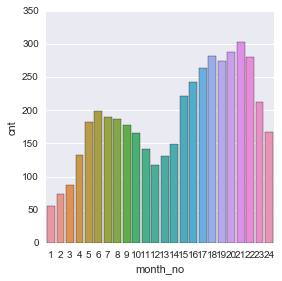

In [45]:
seaborn.factorplot(x='month_no', y='cnt',data=data, kind='bar', ci=None);

Besides the seasonal trend discussed above, this graph also shows that over time, the bike rental company rents out more bikes.

## Weather influences
To make the results of the scatterplots a bit more readable and to take out the effects of hour of the day, I decided to plot the effects of humidity, temperature, and windspeed as averages aggregated over the whole day (rather than for each hour).

In [73]:
weatherdata = data.groupby('dteday')['hum','temp','windspeed','cnt'].mean()
weatherdata.head()

,hum,temp,windspeed,cnt
dteday,,,,
2011-01-01,0.805833,0.344167,0.160446,41.041667
2011-01-02,0.696087,0.363478,0.248539,34.826087
2011-01-03,0.437273,0.196364,0.248309,61.318182
2011-01-04,0.590435,0.200000,0.160296,67.913043
2011-01-05,0.436957,0.226957,0.186900,69.565217


### weathersituation

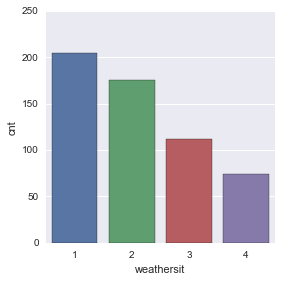

In [74]:
seaborn.factorplot(x='weathersit', y='cnt',data=data, kind='bar', ci=None);

As the weather gets worse, less bikes are rented out.

### temperature


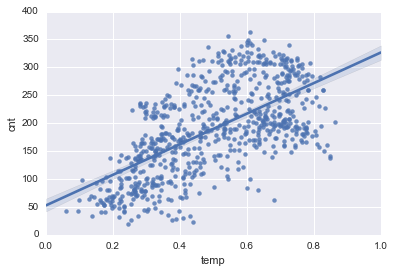

In [75]:
seaborn.regplot(x='temp',y='cnt',data=weatherdata);

The number of bikes rented goes up with temperature.

### humidity

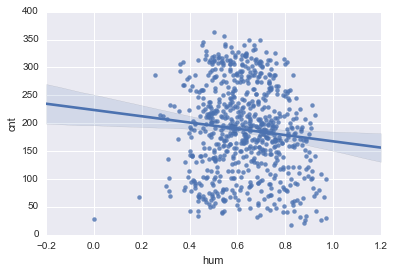

In [71]:
seaborn.regplot(x='hum',y='cnt',data=weatherdata);

The number of bikes rented goes down with humidity, but the correlation doesn't seem very strong.

### windspeed

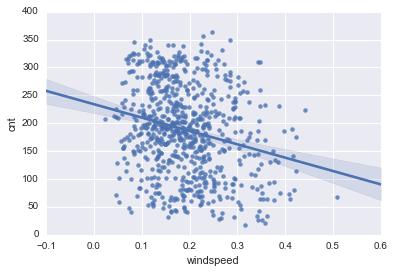

In [72]:
seaborn.regplot(x='windspeed',y='cnt',data=weatherdata);

The number of bikes rented goes down with windspeed, but the correlation doesn't seem very strong.